In [54]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import integrate
from scipy import interpolate
import math
from scipy import signal
from numba import jit
%run StreamClass.ipynb
%run KalmanFilter.ipynb

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


## Plot each variable on a graph

Parsed File
Freq. of Acceleration 1583.554443181799
Freq. of Lin. Acceleration 669.8833983859098
Freq. of Gyroscope 1585.3892195648934
Interpolated Samples
Rotated Acceleration
Integrated Acceleration
Loaded Ground Truth
Aligned Ground Truth
[[ 5.54200000e-02  0.00000000e+00  0.00000000e+00]
 [ 8.82300000e-02  0.00000000e+00  0.00000000e+00]
 [ 9.07300001e-02  0.00000000e+00  0.00000000e+00]
 ...
 [ 6.08220550e+02 -1.19947391e+03  4.18868736e+02]
 [ 6.08228120e+02 -1.19947391e+03  4.18868736e+02]
 [ 6.08233160e+02 -1.19947391e+03  4.18868736e+02]]
[[ 5.54200000e-02 -2.59342437e+00  5.14519443e+01]
 [ 8.82300000e-02 -2.59342450e+00  5.14519445e+01]
 [ 9.07300001e-02 -2.59342451e+00  5.14519445e+01]
 ...
 [ 6.08220550e+02 -2.60423820e+00  5.14557374e+01]
 [ 6.08228120e+02 -2.60423858e+00  5.14557377e+01]
 [ 6.08233160e+02 -2.60423883e+00  5.14557379e+01]]
(101740, 4)


<IPython.core.display.Javascript object>


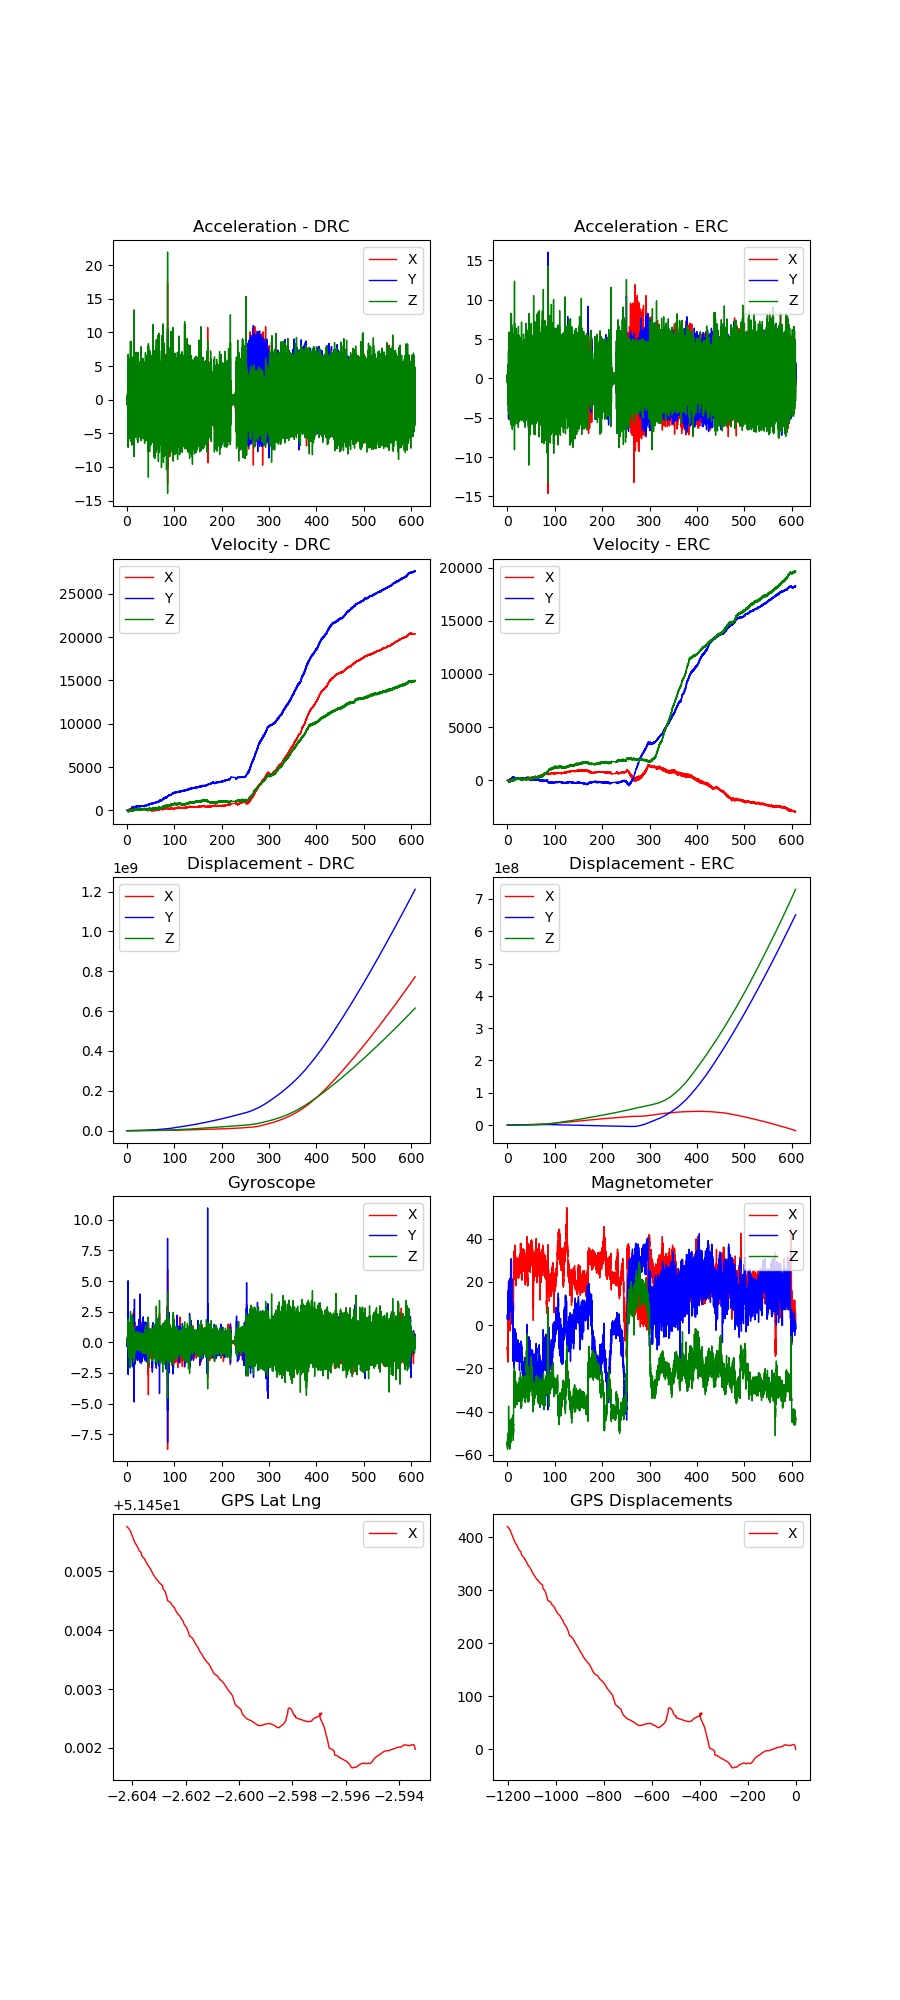

In [55]:
data = Data_Stream("uni", load_truth=True)

print(data.ground_truth.dis)
print(data.ground_truth.latlngs)
print(data.acc_DRC.shape)
data.plot()

[[5.54200000e-02 0.00000000e+00 0.00000000e+00]
 [8.82300000e-02 0.00000000e+00 0.00000000e+00]
 [9.07300001e-02 0.00000000e+00 0.00000000e+00]
 ...
 [6.08220550e+02 0.00000000e+00 0.00000000e+00]
 [6.08228120e+02 0.00000000e+00 0.00000000e+00]
 [6.08233160e+02 0.00000000e+00 0.00000000e+00]]
[[5.54200000e-02 0.00000000e+00 0.00000000e+00]
 [8.82300000e-02 0.00000000e+00 0.00000000e+00]
 [9.07300001e-02 0.00000000e+00 0.00000000e+00]
 ...
 [6.08220550e+02 0.00000000e+00 0.00000000e+00]
 [6.08228120e+02 0.00000000e+00 0.00000000e+00]
 [6.08233160e+02 0.00000000e+00 0.00000000e+00]]


## Kalman Filter Implementation

In [56]:
# %lprun -f compute_kalman(data)
# compute_kalman(data, reverse=True)

compute_kalman(data, acc_stddev=1.73)
compute_kalman(data, reverse=True, acc_stddev=1.73)
# %lprun -T lprof0 -f compute_kalman compute_kalman(data)
# %cat lprof0
mean_kal = (data.kal_latlng + data.kal_latlng_reverse)/2.0

In [57]:
%matplotlib notebook
plt.figure(figsize=(9, 7))
ax=plt.subplot(111)
plt.plot(data.ground_truth.latlngs[:, 1], data.ground_truth.latlngs[:, 2], 'g-', lw=1, label='Ground Truth')
# plt.plot(data.kal_latlng[:, 1], data.kal_latlng[:, 2], 'b-', lw=1, label='Forward')
# plt.plot(data.kal_latlng_reverse[:, 1], data.kal_latlng_reverse[:, 2], 'c-', lw=1, label='Backward')
plt.plot(mean_kal[:, 1], mean_kal[:, 2], 'b-', lw=1, label='Mean of Forward and Backwards KF')
plt.plot(data.gps_latlng[:, 1], data.gps_latlng[:, 2], 'r-', lw=1, label='GPS')
plt.xlabel('Position X (Metres)')
plt.ylabel('Position Y (Metres)')
ax.legend()

<IPython.core.display.Javascript object>

Plot Kalman Filter output against original Sensor Input

## Plotting Overlay on Google Maps
https://www.geeksforgeeks.org/python-plotting-google-map-using-gmplot-package/

https://github.com/pbugnion/gmaps

https://jupyter-gmaps.readthedocs.io/en/latest/

In [ ]:
import gmaps
import gmaps.datasets

f = open('apikey.txt')
a = f.readline()

gmaps.configure(api_key=a) # Your Google API key

f_layout = {'width': '900px','height': '800px','border': '1px solid black', 'padding': '1px'}
fig = gmaps.figure(layout = f_layout, center=(data.kal_latlng[0, 2], 
                                              data.kal_latlng[0, 1]), zoom_level=18, map_type='HYBRID')
lines = []

# locations_kal = gmaps.heatmap_layer([(i[0, 2], i[0, 1]) for i in data.kal_latlng])
# locations_kal.gradient = [(0, 0, 0, 0.0), (0, 0, 255, 1), (0, 0, 128, 1)]
# locations_kal.max_intensity = 1
# locations_kal.point_radius = 5
# print("Kalman Heatmap Layer")

# locations_kal_rev = gmaps.heatmap_layer([(i[0, 2], i[0, 1]) for i in data.kal_latlng_reverse])
# locations_kal_rev.gradient = [(0, 0, 0, 0.0), (0, 255, 255, 1), (0, 128, 128, 1)]
# locations_kal_rev.max_intensity = 1
# locations_kal_rev.point_radius = 5
# print("Kalman Reverse Heatmap Layer")

locations_mean_kal = gmaps.heatmap_layer([(i[0, 2], i[0, 1]) for i in mean_kal])
locations_mean_kal.gradient = [(0, 0, 0, 0.0), (255, 0, 255, 1), (128, 0, 255, 1)]
locations_mean_kal.max_intensity = 1
locations_mean_kal.point_radius = 5
print("Kalman Mean Heatmap Layer")


locations_gps = gmaps.heatmap_layer([(i[0, 2], i[0, 1]) for i in data.gps_latlng])
locations_gps.gradient = [(0, 0, 0, 0.0), (255, 0, 0, 1), (128, 0, 0 , 1)]
locations_gps.max_intensity = 1
locations_gps.point_radius = 5
print("GPS Heatmap Layer")


locations_gt = gmaps.heatmap_layer([(i[0, 2], i[0, 1]) for i in data.ground_truth.latlngs])
locations_gt.gradient = [(0, 0, 0, 0.0), (0, 255, 0, 1), (0, 128, 0 , 1)]
locations_gt.max_intensity = 1
locations_gt.point_radius = 5
print("Ground Truth Heatmap Layer")

Kalman Mean Heatmap Layer
GPS Heatmap Layer
Ground Truth Heatmap Layer


In [ ]:
# fig.add_layer(locations_kal_rev)
# fig.add_layer(locations_kal)
fig.add_layer(locations_mean_kal)
fig.add_layer(locations_gps)
fig.add_layer(locations_gt)
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='1px', width='900px'))

In [ ]:

# compute_kalman(data, reverse=True, acc_stddev=sigma)
# print("Accuracy of Kalman Filter Backwards", measure_accuracy(data.ground_truth.dis[:, 1:3], 
#                                                           data.kal_dis_reverse[:, 1:3]))
gps_accuracy =  measure_accuracy(data.ground_truth.dis[:, 1:3], data.gps[:, 1:3])
print("Accuracy of GPS", gps_accuracy)
kal_accuracy = 500
best_sigma = -100

accs = []

sigmas = np.linspace(0.0, 3, 301)

for sigma in sigmas:
    
    compute_kalman(data, acc_stddev=sigma)
    compute_kalman(data, acc_stddev=sigma, reverse=True)
    
    mean_kal = (data.kal_dis + data.kal_dis_reverse)/2.0
    test_accuracy = measure_accuracy(data.ground_truth.dis[:, 1:3], mean_kal[:, 1:3])
    
#     print("Testing ", sigma, "Accuracy, ", test_accuracy)
    accs.append(test_accuracy)

    if(test_accuracy < kal_accuracy):
        kal_accuracy = test_accuracy
        best_sigma = sigma


print("Accuracy of Kalman Filter Mean", kal_accuracy, " at ", best_sigma)

print("Percentage Improvement", 1-kal_accuracy/gps_accuracy)

Accuracy of GPS 3.9384054847939365


In [ ]:
plt.figure(figsize=(9, 8))
ax=plt.subplot(111)
plt.plot(sigmas, [gps_accuracy for i in accs])
plt.plot(sigmas, accs)